In [1]:
# Gallery using chained method interface

In [2]:
import schemdraw
from schemdraw import elements as elm
from schemdraw import logic
from schemdraw import dsp
from schemdraw import flow
from schemdraw.util import Point

from schemdraw.parsing import logicparse
#schemdraw.use('svg')
#schemdraw.svgconfig.text = 'text'

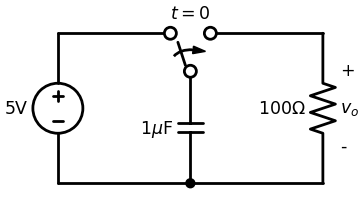

In [3]:
with schemdraw.Drawing() as d:
    V1 = elm.SourceV().label('5V')
    elm.Line().right(d.unit*.75)
    S1 = elm.SwitchSpdt2(action='close').up().anchor('b').label('$t=0$', loc='rgt')
    elm.Line().right(d.unit*.75).at(S1.c)
    elm.Resistor().down().label('$100\Omega$').label(['+','$v_o$','-'], loc='bot')
    elm.Line().to(V1.start)
    elm.Capacitor().at(S1.a).toy(V1.start).label('1$\mu$F').dot()

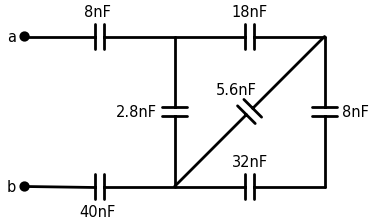

In [4]:
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    C1 = elm.Capacitor().label('8nF').idot().label('a', 'left')
    C2 = elm.Capacitor().label('18nF')
    C3 = elm.Capacitor().down().label('8nF', loc='bottom')
    C4 = elm.Capacitor().left().label('32nF')
    C5 = elm.Capacitor().label('40nF', loc='bottom').dot().label('b', 'left')
    C6 = elm.Capacitor().endpoints(C1.end, C5.start).label('2.8nF')
    C7 = (elm.Capacitor().endpoints(C2.end, C5.start)
          .label('5.6nF', loc='center', ofst=(-.3, -.1), halign='right', valign='bottom'))

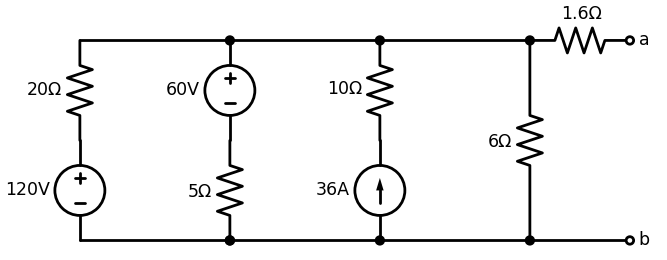

In [5]:
with schemdraw.Drawing() as d:
    d.config(unit=2)  # unit=2 makes elements have shorter than normal leads
    d.push()
    R1 = elm.Resistor().down().label('20Ω')
    V1 = elm.SourceV().down().reverse().label('120V')
    elm.Line().right(3).dot()
    d.pop()
    elm.Line().right(3).dot()
    elm.SourceV().down().reverse().label('60V')
    elm.Resistor().label('5Ω').dot()
    elm.Line().right(3).dot()
    elm.SourceI().up().label('36A')
    elm.Resistor().label('10Ω').dot()
    elm.Line().left(3).hold()
    elm.Line().right(3).dot()
    R6 = elm.Resistor().toy(V1.end).label('6Ω').dot()
    elm.Line().left(3).hold()
    elm.Resistor().right().at(R6.start).label('1.6Ω').dot(open=True).label('a', 'right')
    elm.Line().right().at(R6.end).dot(open=True).label('b', 'right')

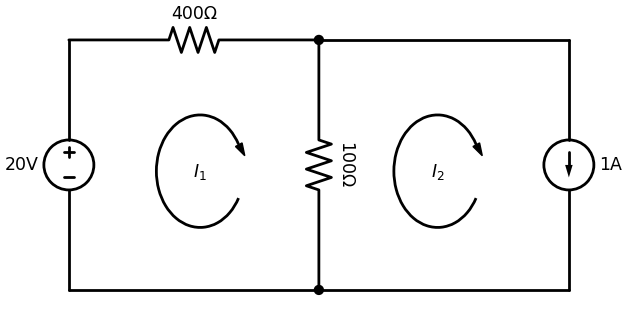

In [6]:
with schemdraw.Drawing() as d:
    d.config(unit=5)
    V1 = elm.SourceV().label('20V')
    R1 = elm.Resistor().right().label('400Ω')
    elm.Dot()
    d.push()
    R2 = elm.Resistor().down().label('100Ω', loc='bot', rotate=True)
    elm.Dot()
    d.pop()
    L1 = elm.Line()
    I1 = elm.SourceI().down().label('1A', loc='bot')
    L2 = elm.Line().tox(V1.start)
    elm.LoopCurrent([R1,R2,L2,V1], pad=1.25).label('$I_1$')
    elm.LoopCurrent([R1,I1,L2,R2], pad=1.25).label('$I_2$')    # Use R1 as top element for both so they get the same height

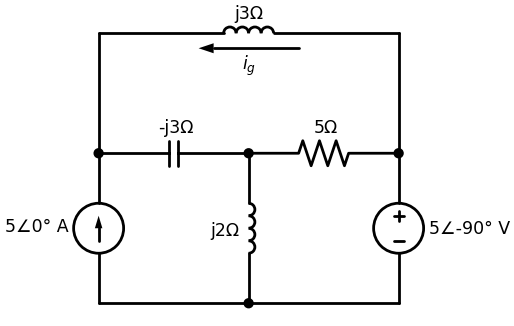

In [7]:
with schemdraw.Drawing() as d:
    I1 = elm.SourceI().label('5∠0° A').dot()
    d.push()
    elm.Capacitor().right().label('-j3Ω').dot()
    elm.Inductor().down().label('j2Ω').dot().hold()
    elm.Resistor().right().label('5Ω').dot()
    V1 = elm.SourceV().down().reverse().label('5∠-90° V', loc='bot')
    elm.Line().tox(I1.start)
    d.pop()
    elm.Line().up(d.unit*.8)
    L1 = elm.Inductor().tox(V1.start).label('j3Ω')
    elm.Line().down(d.unit*.8)
    elm.CurrentLabel(top=False, ofst=.3).at(L1).label('$i_g$')

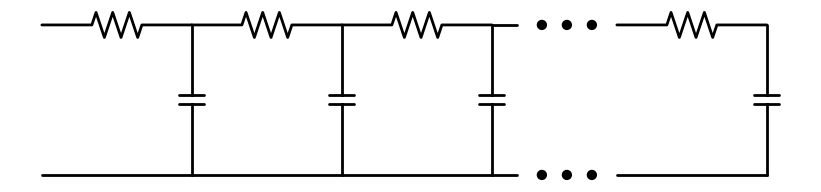

In [8]:
with schemdraw.Drawing(show=False) as d1:
    elm.Resistor()
    d1.push()
    elm.Capacitor().down()
    elm.Line().left()
    d1.pop()

with schemdraw.Drawing() as d2:
    for i in range(3):
        elm.ElementDrawing(d1)

    d2.push()
    elm.Line().length(d2.unit/6)
    elm.DotDotDot()
    elm.ElementDrawing(d1)
    d2.pop()
    d2.move(dy=-d2.unit)
    elm.Line().right().length(d2.unit/6)
    elm.DotDotDot()


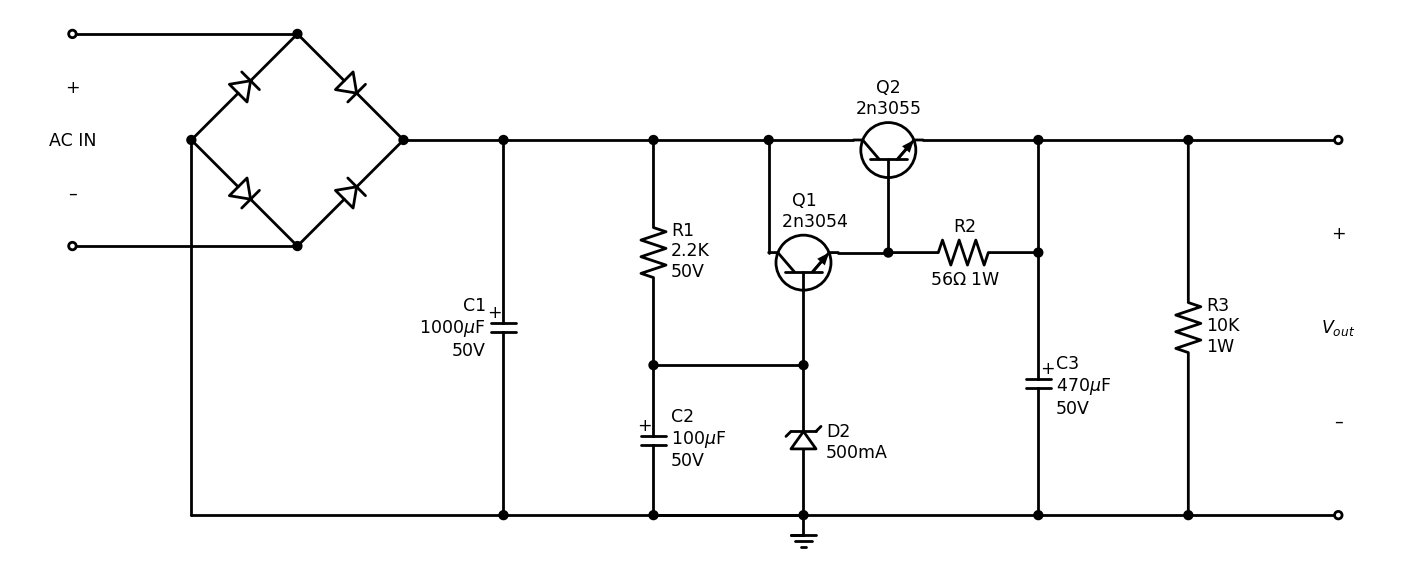

In [9]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=.5, unit=3)
    D = elm.Rectifier()
    elm.Line().left(d.unit*1.5).at(D.N).dot(open=True).idot()
    elm.Line().left(d.unit*1.5).at(D.S).dot(open=True).idot()
    G = elm.Gap().toy(D.N).label(['–', 'AC IN', '+'])

    top = elm.Line().right(d.unit*3).at(D.E).idot()
    Q2 = elm.BjtNpn(circle=True).up().anchor('collector').label('Q2\n2n3055')
    elm.Line().down(d.unit/2).at(Q2.base)
    Q2b = elm.Dot()
    elm.Line().left(d.unit/3)
    Q1 = elm.BjtNpn(circle=True).up().anchor('emitter').label('Q1\n    2n3054')
    elm.Line().at(Q1.collector).toy(top.center).dot()

    elm.Line().down(d.unit/2).at(Q1.base).dot()
    elm.Zener().down().reverse().label('D2\n500mA', loc='bot').dot()
    G = elm.Ground()
    elm.Line().left().dot()
    elm.Capacitor(polar=True).up().reverse().label('C2\n100$\mu$F\n50V', loc='bot').dot()
    elm.Line().right().hold()
    elm.Resistor().toy(top.end).label('R1\n2.2K\n50V', loc='bot').dot()

    d.move(dx=-d.unit, dy=0)
    elm.Capacitor(polar=True).toy(G.start).flip().label('C1\n 1000$\mu$F\n50V').dot().idot()
    elm.Line().at(G.start).tox(D.W)
    elm.Line().toy(D.W).dot()

    elm.Resistor().right().at(Q2b.center).label('R2').label('56$\Omega$ 1W', loc='bot').dot()
    d.push()
    elm.Line().toy(top.start).dot()
    elm.Line().tox(Q2.emitter)
    d.pop()
    elm.Capacitor(polar=True).toy(G.start).label('C3\n470$\mu$F\n50V', loc='bot').dot()
    elm.Line().tox(G.start).hold()
    elm.Line().right().dot()
    elm.Resistor().toy(top.center).label('R3\n10K\n1W', loc='bot').dot()
    elm.Line().left().hold()
    elm.Line().right()
    elm.Dot(open=True)
    elm.Gap().toy(G.start).label(['+', '$V_{out}$', '–'])
    elm.Dot(open=True)
    elm.Line().left()

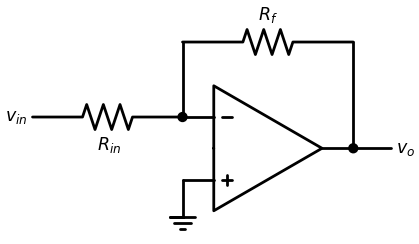

In [10]:
with schemdraw.Drawing() as d:
    op = elm.Opamp(leads=True)
    elm.Line().down(d.unit/4).at(op.in2)
    elm.Ground(lead=False)
    Rin = elm.Resistor().at(op.in1).left().idot().label('$R_{in}$', loc='bot').label('$v_{in}$', loc='left')
    elm.Line().up(d.unit/2).at(op.in1)
    elm.Resistor().tox(op.out).label('$R_f$')
    elm.Line().toy(op.out).dot()
    elm.Line().right(d.unit/4).at(op.out).label('$v_{o}$', loc='right')

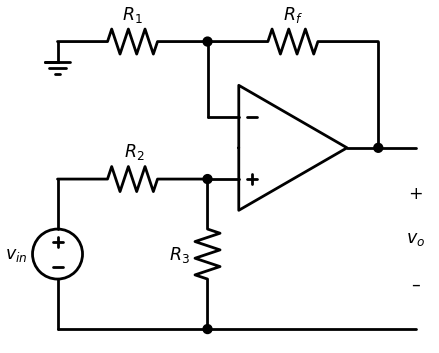

In [11]:
with schemdraw.Drawing() as d:
    op = elm.Opamp(leads=True)
    out = elm.Line(at=op.out).length(.75)
    elm.Line().up().at(op.in1).length(1.5).dot()
    d.push()
    elm.Resistor().left().label('$R_1$')
    elm.Ground()
    d.pop()
    elm.Resistor().tox(op.out).label('$R_f$')
    elm.Line().toy(op.out).dot()
    elm.Resistor().left().at(op.in2).idot().label('$R_2$')
    elm.SourceV().down().reverse().label('$v_{in}$')
    elm.Line().right().dot()
    elm.Resistor().up().label('$R_3$').hold()
    elm.Line().tox(out.end)
    elm.Gap().toy(op.out).label(['–','$v_o$','+'])

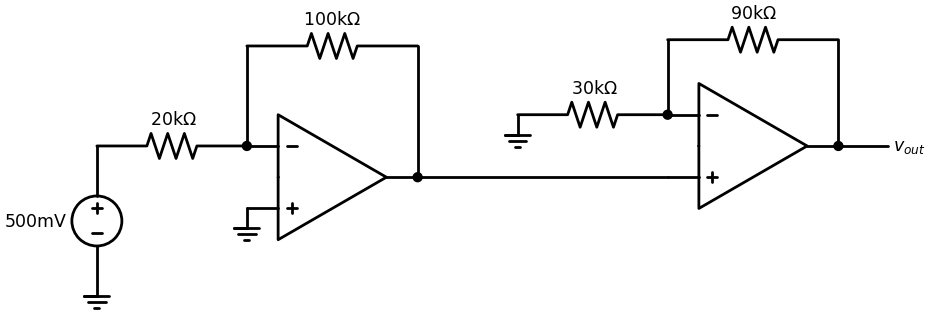

In [12]:
with schemdraw.Drawing() as d:
    elm.Ground(lead=False)
    elm.SourceV().label('500mV')
    elm.Resistor().right().label('20k$\Omega$').dot()
    O1 = elm.Opamp(leads=True).anchor('in1')
    elm.Ground().at(O1.in2)
    elm.Line().up(2).at(O1.in1)
    elm.Resistor().tox(O1.out).label('100k$\Omega$')
    elm.Line().toy(O1.out).dot()
    elm.Line().right(5).at(O1.out)
    O2 = elm.Opamp(leads=True).anchor('in2')
    elm.Resistor().left().at(O2.in1).idot().label('30k$\Omega$')
    elm.Ground()
    elm.Line().up(1.5).at(O2.in1)
    elm.Resistor().tox(O2.out).label('90k$\Omega$')
    elm.Line().toy(O2.out).dot()
    elm.Line().right(1).at(O2.out).label('$v_{out}$', loc='rgt')

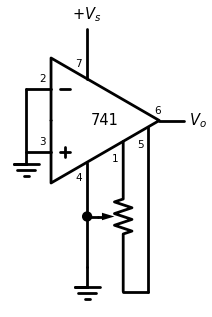

In [13]:
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    op = (elm.Opamp().label('741', loc='center', ofst=0)
                 .label('1', 'n1', fontsize=9, ofst=(-.1, -.25), halign='right', valign='top')
                 .label('5', 'n1a', fontsize=9, ofst=(-.1, -.25), halign='right', valign='top')
                 .label('4', 'vs', fontsize=9, ofst=(-.1, -.2), halign='right', valign='top')
                 .label('7', 'vd', fontsize=9, ofst=(-.1, .2), halign='right', valign='bottom')
                 .label('2', 'in1', fontsize=9, ofst=(-.1, .1), halign='right', valign='bottom')
                 .label('3', 'in2', fontsize=9, ofst=(-.1, .1), halign='right', valign='bottom')
                 .label('6', 'out', fontsize=9, ofst=(-.1, .1), halign='left', valign='bottom'))
    elm.Line().left(.5).at(op.in1)
    elm.Line().down(d.unit/2)
    elm.Ground(lead=False)
    elm.Line().left(.5).at(op.in2)
    elm.Line().right(.5).at(op.out).label('$V_o$', 'right')
    elm.Line().up(1).at(op.vd).label('$+V_s$', 'right')
    trim = elm.Potentiometer().down().at(op.n1).flip().scale(0.7)
    elm.Line().tox(op.n1a)
    elm.Line().up().to(op.n1a)
    elm.Line().at(trim.tap).tox(op.vs).dot()
    d.push()
    elm.Line().down(d.unit/3)
    elm.Ground()
    d.pop()
    elm.Line().toy(op.vs)

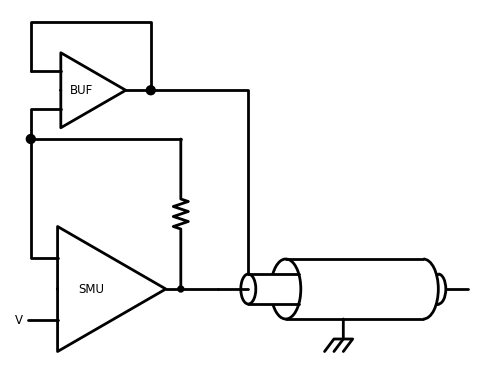

In [14]:
with schemdraw.Drawing() as d:
    d.config(fontsize=10)
    elm.Line().length(d.unit/5).label('V', 'left')
    smu = (elm.Opamp(sign=False).anchor('in2')
                     .label('SMU', 'center', ofst=[-.4, 0], halign='center', valign='center'))
    elm.Line().at(smu.out).length(.3)
    d.push()
    elm.Line().length(d.unit/4)
    triax = elm.Triax(length=5, shieldofststart=.75)
    d.pop()
    elm.Resistor().up().scale(0.6).idot()
    elm.Line().left().dot()
    elm.Wire('|-').to(smu.in1).hold()
    elm.Wire('|-').delta(d.unit/5, d.unit/5)
    buf = (elm.Opamp(sign=False).anchor('in2').scale(0.6)
           .label('BUF', 'center', ofst=(-.4, 0), halign='center', valign='center'))

    elm.Line().left(d.unit/5).at(buf.in1)
    elm.Wire('n').to(buf.out, dx=.5).dot()
    elm.Wire('-|').at(buf.out).to(triax.guardstart_top)
    elm.GroundChassis().at(triax.shieldcenter)

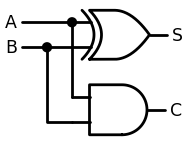

In [15]:
with schemdraw.Drawing() as d:
    d.config(unit=0.5)
    S = logic.Xor().label('S', 'right')
    logic.Line().left(d.unit*2).at(S.in1).idot().label('A', 'left')
    B = logic.Line().left().at(S.in2).dot()
    logic.Line().left().label('B', 'left')
    logic.Line().down(d.unit*3).at(S.in1)
    C = logic.And().right().anchor('in1').label('C', 'right')
    logic.Wire('|-').at(B.end).to(C.in2)

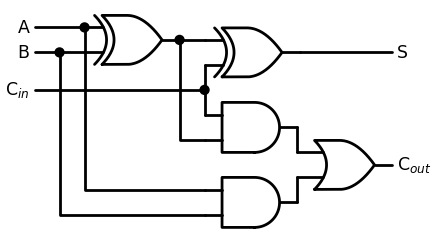

In [16]:
with schemdraw.Drawing() as d:
    d.config(unit=0.5)
    X1 = logic.Xor()
    A = logic.Line().left(d.unit*2).at(X1.in1).idot().label('A', 'left')
    B = logic.Line().left().at(X1.in2).dot()
    logic.Line().left().label('B', 'left')

    logic.Line().right().at(X1.out).idot()
    X2 = logic.Xor().anchor('in1')
    C = logic.Line().down(d.unit*2).at(X2.in2)
    d.push()
    logic.Dot().at(C.center)
    logic.Line().tox(A.end).label('C$_{in}$', 'left')
    d.pop()

    A1 = logic.And().right().anchor('in1')
    logic.Wire('-|').at(A1.in2).to(X1.out)
    d.move_from(A1.in2, dy=-d.unit*2)
    A2 = logic.And().right().anchor('in1')
    logic.Wire('-|').at(A2.in1).to(A.start)
    logic.Wire('-|').at(A2.in2).to(B.end)
    d.move_from(A1.out, dy=-(A1.out.y-A2.out.y)/2)
    O1 = logic.Or().right().label('C$_{out}$', 'right')
    logic.Line().at(A1.out).toy(O1.in1)
    logic.Line().at(A2.out).toy(O1.in2)
    logic.Line().at(X2.out).tox(O1.out).label('S', 'right')

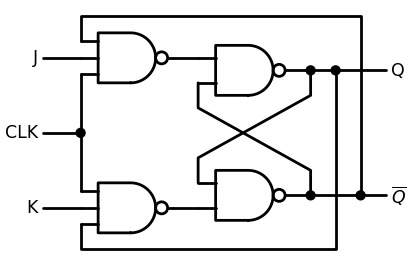

In [17]:
with schemdraw.Drawing() as d:
    # Two front gates (SR latch)
    G1 = logic.Nand(leadout=.75).anchor('in1')
    logic.Line().length(d.unit/2).label('Q', 'right')
    d.move_from(G1.in1, dy=-2.5)
    G2 = logic.Nand(leadout=.75).anchor('in1')
    logic.Line().length(d.unit/2).label('$\overline{Q}$', 'right')
    logic.Wire('N', k=.5).at(G2.in1).to(G1.out).dot()
    logic.Wire('N', k=.5).at(G1.in2).to(G2.out).dot()

    # Two back gates
    logic.Line().left(d.unit/6).at(G1.in1)
    J = logic.Nand(inputs=3).anchor('out').right()
    logic.Wire('n', k=.5).at(J.in1).to(G2.out, dx=1).dot()
    logic.Line().left(d.unit/4).at(J.in2).label('J', 'left')
    logic.Line().left(d.unit/6).at(G2.in2)
    K = logic.Nand(inputs=3).right().anchor('out')
    logic.Wire('n', k=-.5).at(K.in3).to(G1.out, dx=.5).dot()
    logic.Line().left(d.unit/4).at(K.in2).label('K', 'left')
    C = logic.Line().at(J.in3).toy(K.in1)
    logic.Dot().at(C.center)
    logic.Line().left(d.unit/4).label('CLK', 'left')

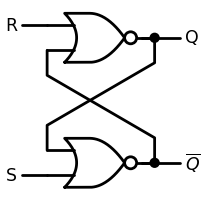

In [18]:
with schemdraw.Drawing() as d:
    g1 = logic.Nor()
    d.move_from(g1.in1, dy=-2.5)
    g2 = logic.Nor().anchor('in1')
    g1out = logic.Line().right(.25).at(g1.out)
    logic.Wire('N', k=.5).at(g2.in1).to(g1out.end).dot()
    g2out = logic.Line().right(.25).at(g2.out)
    logic.Wire('N', k=.5).at(g1.in2).to(g2out.end).dot()
    logic.Line().at(g1.in1).left(.5).label('R', 'left')
    logic.Line().at(g2.in2).left(.5).label('S', 'left')
    logic.Line().at(g1.out).right(.75).label('Q', 'right')
    logic.Line().at(g2.out).right(.75).label('$\overline{Q}$', 'right')

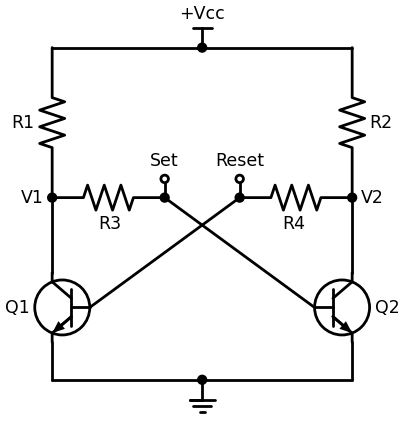

In [19]:
with schemdraw.Drawing() as d:
    Q1 = elm.BjtNpn(circle=True).reverse().label('Q1', 'left')
    Q2 = elm.BjtNpn(circle=True).at((d.unit*2, 0)).label('Q2')
    elm.Line().up(d.unit/2).at(Q1.collector)

    R1 = elm.Resistor().up().label('R1').hold()
    elm.Dot().label('V1', 'left')
    elm.Resistor().right(d.unit*.75).label('R3', 'bottom').dot()
    elm.Line().up(d.unit/8).dot(open=True).label('Set', 'right').hold()
    elm.Line().to(Q2.base)

    elm.Line().up(d.unit/2).at(Q2.collector)
    elm.Dot().label('V2', 'right')
    R2 = elm.Resistor().up().label('R2', 'bottom').hold()
    elm.Resistor().left(d.unit*.75).label('R4', 'bottom').dot()
    elm.Line().up(d.unit/8).dot(open=True).label('Reset', 'right').hold()
    elm.Line().to(Q1.base)

    elm.Line().down(d.unit/4).at(Q1.emitter)
    BOT = elm.Line().tox(Q2.emitter)
    elm.Line().to(Q2.emitter)
    elm.Dot().at(BOT.center)
    elm.Ground().at(BOT.center)

    TOP = elm.Line().endpoints(R1.end, R2.end)
    elm.Dot().at(TOP.center)
    elm.Vdd().at(TOP.center).label('+Vcc')

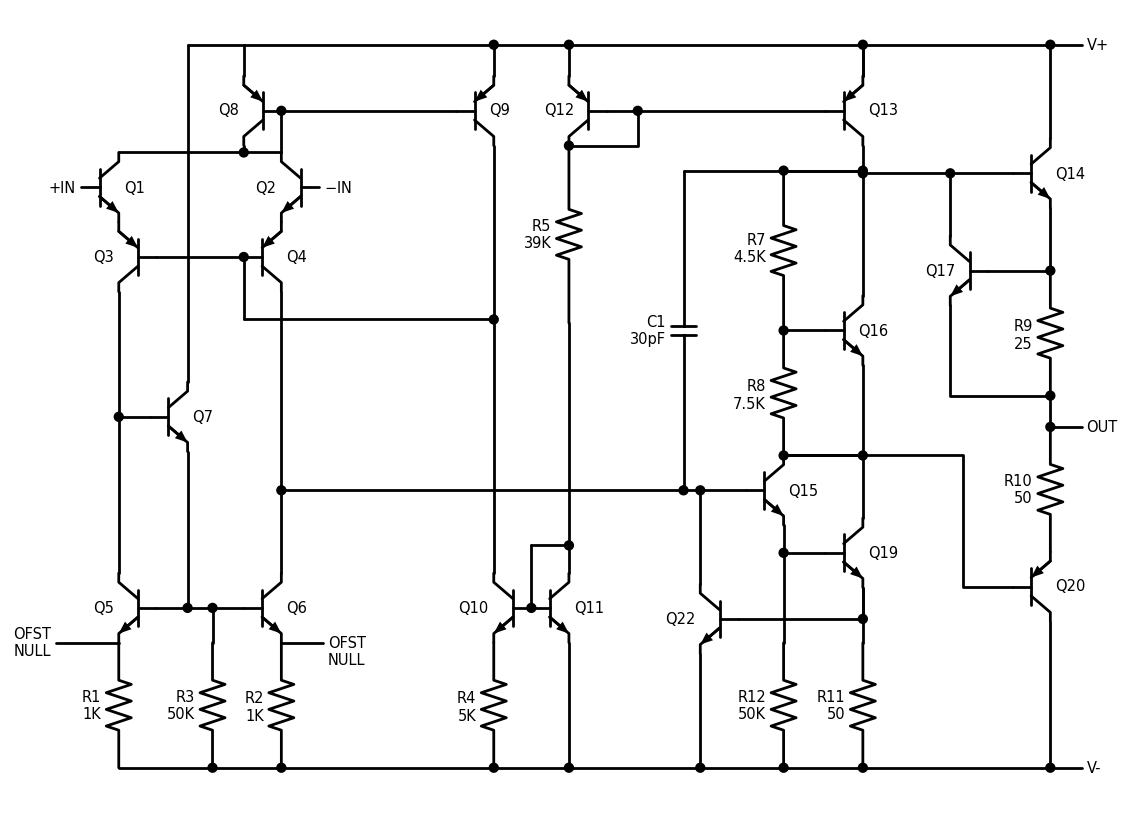

In [20]:
with schemdraw.Drawing() as d:
    d.config(fontsize=12, unit=2.5)
    Q1 = elm.BjtNpn().label('Q1').label('+IN', 'left')
    Q3 = elm.BjtPnp().left().at(Q1.emitter).anchor('emitter').flip().label('Q3', 'left')
    elm.Line().down().at(Q3.collector).dot()
    d.push()
    elm.Line().right(d.unit/4)
    Q7 = elm.BjtNpn().anchor('base').label('Q7')
    d.pop()
    elm.Line().down(d.unit*1.25)
    Q5 = elm.BjtNpn().left().flip().anchor('collector').label('Q5', 'left')
    elm.Line().left(d.unit/2).at(Q5.emitter).label('OFST\nNULL', 'left').flip()
    elm.Resistor().down().at(Q5.emitter).label('R1\n1K')
    elm.Line().right(d.unit*.75).dot()
    R3 = elm.Resistor().up().label('R3\n50K')
    elm.Line().toy(Q5.base).dot()
    d.push()
    elm.Line().left().to(Q5.base)
    elm.Line().at(Q7.emitter).toy(Q5.base).dot()
    d.pop()
    elm.Line().right(d.unit/4)
    Q6 = elm.BjtNpn().anchor('base').label('Q6')
    elm.Line().at(Q6.emitter).length(d.unit/3).label('\nOFST\nNULL', 'right').hold()
    elm.Resistor().down().at(Q6.emitter).label('R2\n1K').dot()

    elm.Line().at(Q6.collector).toy(Q3.collector)
    Q4 = elm.BjtPnp().right().anchor('collector').label('Q4')
    elm.Line().at(Q4.base).tox(Q3.base)
    elm.Line().at(Q4.emitter).toy(Q1.emitter)
    Q2 = elm.BjtNpn().left().flip().anchor('emitter').label('Q2', 'left').label('$-$IN', 'right')
    elm.Line().up(d.unit/3).at(Q2.collector).dot()
    Q8 = elm.BjtPnp().left().flip().anchor('base').label('Q8', 'left')
    elm.Line().at(Q8.collector).toy(Q2.collector).dot()
    elm.Line().at(Q2.collector).tox(Q1.collector)
    elm.Line().up(d.unit/4).at(Q8.emitter)
    top = elm.Line().tox(Q7.collector)
    elm.Line().toy(Q7.collector)

    elm.Line().right(d.unit*2).at(top.start)
    elm.Line().down(d.unit/4)
    Q9 = elm.BjtPnp().right().anchor('emitter').label('Q9', ofst=-.1)
    elm.Line().at(Q9.base).tox(Q8.base)
    elm.Dot().at(Q4.base)
    elm.Line().down(d.unit/2).at(Q4.base)
    elm.Line().tox(Q9.collector).dot()
    elm.Line().at(Q9.collector).toy(Q6.collector)
    Q10 = elm.BjtNpn().left().flip().anchor('collector').label('Q10', 'left')
    elm.Resistor().at(Q10.emitter).toy(R3.start).label('R4\n5K').dot()

    Q11 = elm.BjtNpn().right().at(Q10.base).anchor('base').label('Q11')
    elm.Dot().at(Q11.base)
    elm.Line().up(d.unit/2)
    elm.Line().tox(Q11.collector).dot()
    elm.Line().at(Q11.emitter).toy(R3.start).dot()
    elm.Line().up(d.unit*2).at(Q11.collector)
    elm.Resistor().toy(Q9.collector).label('R5\n39K')
    Q12 = elm.BjtPnp().left().flip().anchor('collector').label('Q12', 'left', ofst=-.1)
    elm.Line().up(d.unit/4).at(Q12.emitter).dot()
    elm.Line().tox(Q9.emitter).dot()
    elm.Line().right(d.unit/4).at(Q12.base).dot()
    elm.Wire('|-').to(Q12.collector).dot().hold()
    elm.Line().right(d.unit*1.5)
    Q13 = elm.BjtPnp().anchor('base').label('Q13')
    elm.Line().up(d.unit/4).dot()
    elm.Line().tox(Q12.emitter)
    K = elm.Line().down(d.unit/5).at(Q13.collector).dot()
    elm.Line().down()
    Q16 = elm.BjtNpn().right().anchor('collector').label('Q16', ofst=-.1)
    elm.Line().left(d.unit/3).at(Q16.base).dot()
    R7 = elm.Resistor().up().toy(K.end).label('R7\n4.5K').dot()
    elm.Line().tox(Q13.collector).hold()
    R8 = elm.Resistor().down().at(R7.start).label('R8\n7.5K').dot()
    elm.Line().tox(Q16.emitter)
    J = elm.Dot()
    elm.Line().toy(Q16.emitter)
    Q15 = elm.BjtNpn().right().at(R8.end).anchor('collector').label('Q15')
    elm.Line().left(d.unit/2).at(Q15.base).dot()
    C1 = elm.Capacitor().toy(R7.end).label('C1\n30pF')
    elm.Line().tox(Q13.collector)
    elm.Line().at(C1.start).tox(Q6.collector).dot()
    elm.Line().down(d.unit/2).at(J.center)
    Q19 = elm.BjtNpn().right().anchor('collector').label('Q19')
    elm.Line().at(Q19.base).tox(Q15.emitter).dot()
    elm.Line().toy(Q15.emitter).hold()
    elm.Line().down(d.unit/4).at(Q19.emitter).dot()
    elm.Line().left()
    Q22 = elm.BjtNpn().left().anchor('base').flip().label('Q22', 'left')
    elm.Line().at(Q22.collector).toy(Q15.base).dot()
    elm.Line().at(Q22.emitter).toy(R3.start).dot()
    elm.Line().tox(R3.start).hold()
    elm.Line().tox(Q15.emitter).dot()
    d.push()
    elm.Resistor().up().label('R12\n50K')
    elm.Line().toy(Q19.base)
    d.pop()
    elm.Line().tox(Q19.emitter).dot()
    R11 = elm.Resistor().up().label('R11\n50')
    elm.Line().toy(Q19.emitter)

    elm.Line().up(d.unit/4).at(Q13.emitter)
    elm.Line().right(d.unit*1.5).dot()
    elm.Line().length(d.unit/4).label('V+', 'right').hold()
    elm.Line().down(d.unit*.75)
    Q14 = elm.BjtNpn().right().anchor('collector').label('Q14')
    elm.Line().left(d.unit/2).at(Q14.base)
    d.push()
    elm.Line().down(d.unit/2).idot()
    Q17 = elm.BjtNpn().left().anchor('collector').flip().label('Q17', 'left', ofst=-.1)
    elm.Line().at(Q17.base).tox(Q14.emitter).dot()
    J = elm.Line().toy(Q14.emitter)
    d.pop()
    elm.Line().tox(Q13.collector).dot()
    elm.Resistor().down().at(J.start).label('R9\n25').dot()
    elm.Wire('-|').to(Q17.emitter).hold()
    elm.Line().down(d.unit/4).dot()
    elm.Line().right(d.unit/4).label('OUT', 'right').hold()
    elm.Resistor().down().label('R10\n50')
    Q20 = elm.BjtPnp().right().anchor('emitter').label('Q20')
    elm.Wire('c', k=-1).at(Q20.base).to(Q15.collector)
    elm.Line().at(Q20.collector).toy(R3.start).dot()
    elm.Line().right(d.unit/4).label('V-', 'right').hold()
    elm.Line().tox(R11.start)

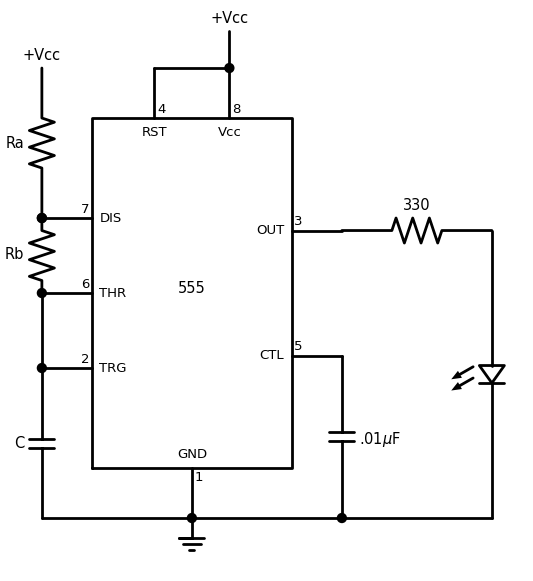

In [21]:
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    T = elm.Ic(pins=[elm.IcPin(name='TRG', side='left', pin='2'),
                     elm.IcPin(name='THR', side='left', pin='6'),
                     elm.IcPin(name='DIS', side='left', pin='7'),
                     elm.IcPin(name='CTL', side='right', pin='5'),
                     elm.IcPin(name='OUT', side='right', pin='3'),
                     elm.IcPin(name='RST', side='top', pin='4'),
                     elm.IcPin(name='Vcc', side='top', pin='8'),
                     elm.IcPin(name='GND', side='bot', pin='1'),],
                edgepadW=.5,
                edgepadH=1,
                pinspacing=1.5,
                leadlen=1,
                label='555')
    BOT = elm.Ground().at(T.GND)
    elm.Dot()
    elm.Resistor().endpoints(T.DIS, T.THR).label('Rb').idot()
    elm.Resistor().up().at(T.DIS).label('Ra').label('+Vcc', 'right')
    elm.Line().endpoints(T.THR, T.TRG)
    elm.Capacitor().at(T.TRG).toy(BOT.start).label('C')
    elm.Line().tox(BOT.start)
    elm.Capacitor().at(T.CTL).toy(BOT.start).label('.01$\mu$F', 'bottom').dot()
    elm.Dot().at(T.DIS)
    elm.Dot().at(T.THR)
    elm.Dot().at(T.TRG)
    elm.Line().endpoints(T.RST,T.Vcc).dot()
    elm.Line().up(d.unit/4).label('+Vcc', 'right')
    elm.Resistor().right().at(T.OUT).label('330')
    elm.LED().flip().toy(BOT.start)
    elm.Line().tox(BOT.start)

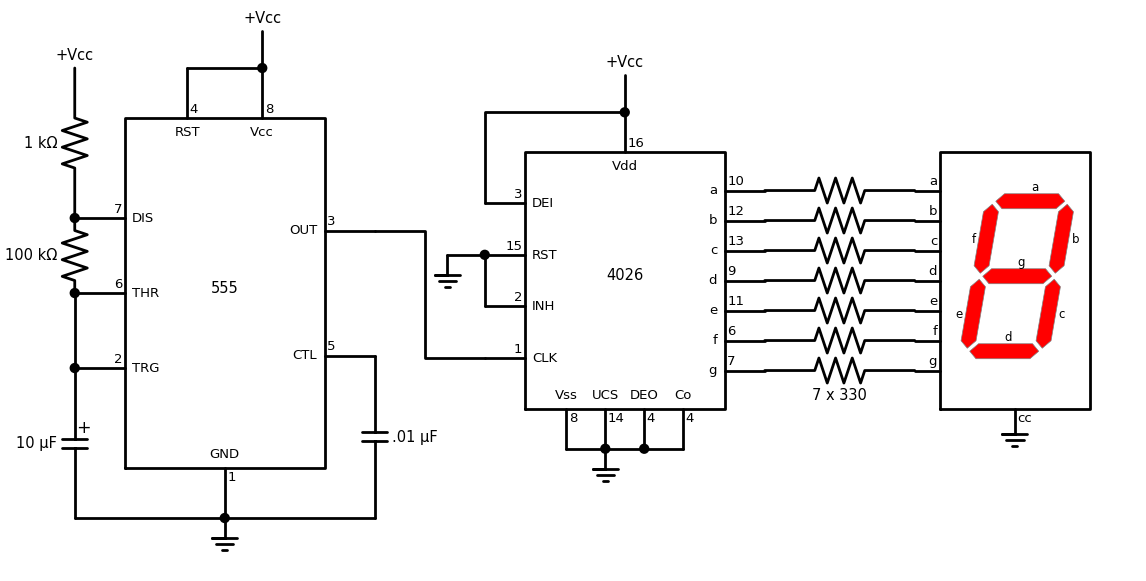

In [22]:
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    IC555 = elm.Ic555()
    gnd = elm.Ground(xy=IC555.GND)
    elm.Dot()
    elm.Resistor().endpoints(IC555.DIS, IC555.THR).label('100 kΩ')
    elm.Resistor().up().at(IC555.DIS).label('1 kΩ').label('+Vcc', 'right')
    elm.Line().endpoints(IC555.THR, IC555.TRG)
    elm.Capacitor(polar=True).at(IC555.TRG).toy(gnd.start).label('10 μF')
    elm.Line().tox(gnd.start)
    elm.Capacitor().at(IC555.CTL).toy(gnd.start).label('.01 μF', 'bottom')
    elm.Line().tox(gnd.start)

    elm.Dot().at(IC555.DIS)
    elm.Dot().at(IC555.THR)
    elm.Dot().at(IC555.TRG)
    elm.Line().endpoints(IC555.RST,IC555.Vcc).dot()
    elm.Line().up(d.unit/4).label('+Vcc', 'right')
    d.move_from(IC555.OUT, dx=5, dy=-1)

    IC4026 = elm.Ic(pins=[elm.IcPin('CLK', pin='1', side='left'),
                          elm.IcPin('INH', pin='2', side='left'), # Inhibit
                          elm.IcPin('RST', pin='15', side='left'),
                          elm.IcPin('DEI', pin='3', side='left'), # Display Enable In
                          elm.IcPin('Vss', pin='8', side='bot'),
                          elm.IcPin('Vdd', pin='16', side='top'),
                          elm.IcPin('UCS', pin='14', side='bot'), # Ungated C Segment
                          elm.IcPin('DEO', pin='4', side='bot'),  # Display Enable Out
                          elm.IcPin('Co', pin='4', side='bot'),   # Carry out
                          elm.IcPin('g', pin='7', side='right'),
                          elm.IcPin('f', pin='6', side='right'),                      
                          elm.IcPin('e', pin='11', side='right'),
                          elm.IcPin('d', pin='9', side='right'),
                          elm.IcPin('c', pin='13', side='right'),
                          elm.IcPin('b', pin='12', side='right'),
                          elm.IcPin('a', pin='10', side='right'),
                         ],
                   w=4, leadlen=.8).label('4026').right().anchor('center')
    elm.Wire('c').at(IC555.OUT).to(IC4026.CLK)
    elm.Line().endpoints(IC4026.INH, IC4026.RST).dot()
    elm.Line().left(d.unit/4)
    elm.Ground()
    elm.Wire('|-').at(IC4026.DEI).to(IC4026.Vdd).dot()
    elm.Line().up(d.unit/4).label('+Vcc', 'right')
    elm.Line().at(IC4026.Vss).tox(IC4026.UCS).dot()
    elm.Ground()
    elm.Line().tox(IC4026.DEO).dot()
    elm.Line().tox(IC4026.Co)

    elm.Resistor().right().at(IC4026.a)
    disp = elm.SevenSegment(cathode=True).anchor('a')
    elm.Resistor().at(IC4026.b)
    elm.Resistor().at(IC4026.c)
    elm.Resistor().at(IC4026.d)
    elm.Resistor().at(IC4026.e)
    elm.Resistor().at(IC4026.f)
    elm.Resistor().at(IC4026.g).label('7 x 330', loc='bottom')
    elm.Ground(lead=False).at(disp.cathode)

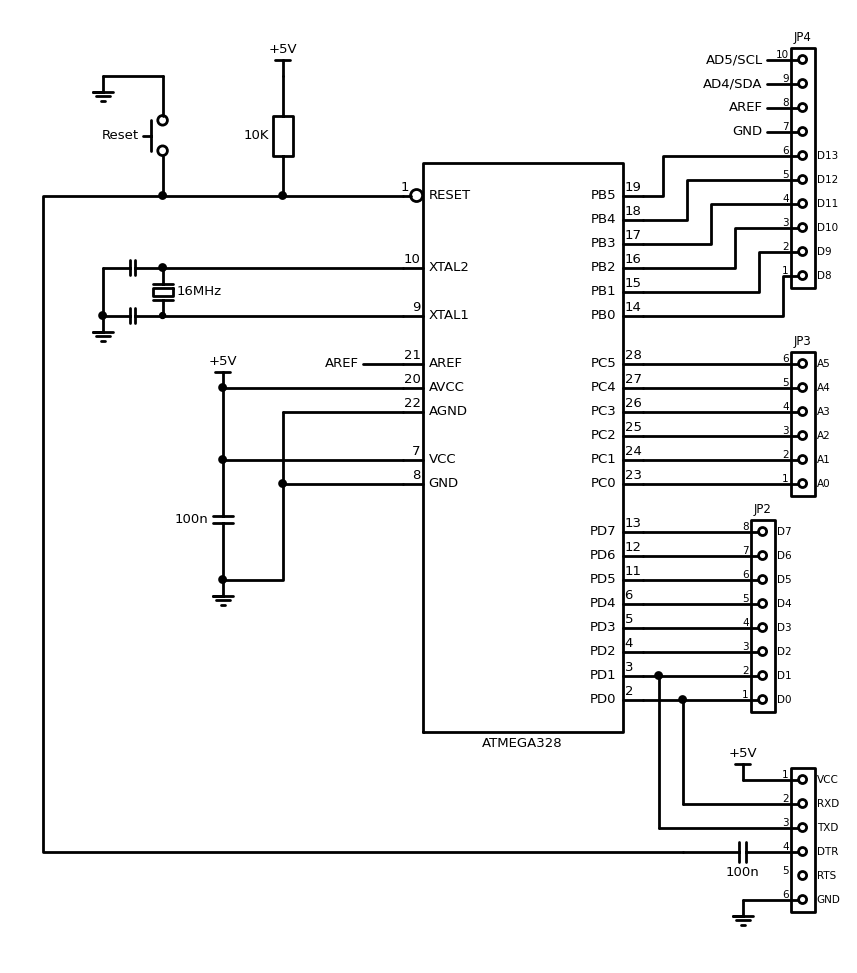

In [23]:
class Atmega328(elm.Ic):
    def __init__(self, *args, **kwargs):
        pins=[elm.IcPin(name='PD0', pin='2', side='r', slot='1/22'),
              elm.IcPin(name='PD1', pin='3', side='r', slot='2/22'),
              elm.IcPin(name='PD2', pin='4', side='r', slot='3/22'),
              elm.IcPin(name='PD3', pin='5', side='r', slot='4/22'),
              elm.IcPin(name='PD4', pin='6', side='r', slot='5/22'),
              elm.IcPin(name='PD5', pin='11', side='r', slot='6/22'),             
              elm.IcPin(name='PD6', pin='12', side='r', slot='7/22'),             
              elm.IcPin(name='PD7', pin='13', side='r', slot='8/22'),
              elm.IcPin(name='PC0', pin='23', side='r', slot='10/22'),
              elm.IcPin(name='PC1', pin='24', side='r', slot='11/22'),
              elm.IcPin(name='PC2', pin='25', side='r', slot='12/22'),
              elm.IcPin(name='PC3', pin='26', side='r', slot='13/22'),
              elm.IcPin(name='PC4', pin='27', side='r', slot='14/22'),
              elm.IcPin(name='PC5', pin='28', side='r', slot='15/22'),
              elm.IcPin(name='PB0', pin='14', side='r', slot='17/22'),
              elm.IcPin(name='PB1', pin='15', side='r', slot='18/22'),
              elm.IcPin(name='PB2', pin='16', side='r', slot='19/22'),
              elm.IcPin(name='PB3', pin='17', side='r', slot='20/22'),
              elm.IcPin(name='PB4', pin='18', side='r', slot='21/22'),
              elm.IcPin(name='PB5', pin='19', side='r', slot='22/22'),
    
              elm.IcPin(name='RESET', side='l', slot='22/22', invert=True, pin='1'),
              elm.IcPin(name='XTAL2', side='l', slot='19/22', pin='10'),
              elm.IcPin(name='XTAL1', side='l', slot='17/22', pin='9'),
              elm.IcPin(name='AREF', side='l', slot='15/22', pin='21'),
              elm.IcPin(name='AVCC', side='l', slot='14/22', pin='20'),
              elm.IcPin(name='AGND', side='l', slot='13/22', pin='22'),
              elm.IcPin(name='VCC', side='l', slot='11/22', pin='7'),
              elm.IcPin(name='GND', side='l', slot='10/22', pin='8')]
        super().__init__(pins=pins, w=5, plblofst=.05, botlabel='ATMEGA328', **kwargs)


with schemdraw.Drawing() as d:
    d.config(fontsize=11, inches_per_unit=.4)
    Q1 = Atmega328()
    JP4 = (elm.Header(rows=10, shownumber=True, pinsright=['D8', 'D9', 'D10', 'D11', 'D12', 'D13', '', '', '', ''], pinalignright='center')
                      .flip().at(Q1.PB5, dx=4, dy=1).anchor('pin6').label('JP4', fontsize=10))

    JP3 = (elm.Header(rows=6, shownumber=True, pinsright=['A0', 'A1', 'A2', 'A3', 'A4', 'A5'], pinalignright='center')
                      .flip().at(Q1.PC5, dx=4).anchor('pin6').label('JP3', fontsize=10))

    JP2 = (elm.Header(rows=8, shownumber=True, pinsright=['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7'],
                      pinalignright='center')).at(Q1.PD7, dx=3).flip().anchor('pin8').label('JP2', fontsize=10)

    elm.OrthoLines(n=6).at(Q1.PB5).to(JP4.pin6)
    elm.OrthoLines(n=6).at(Q1.PC5).to(JP3.pin6)
    elm.OrthoLines(n=8).at(Q1.PD7).to(JP2.pin8)

    elm.Line().left(.9).at(JP4.pin7).label('GND', 'left')
    elm.Line().left(.9).at(JP4.pin8).label('AREF', 'left')
    elm.Line().left(.9).at(JP4.pin9).label('AD4/SDA', 'left')
    elm.Line().left(.9).at(JP4.pin10).label('AD5/SCL', 'left')

    JP1 = (elm.Header(rows=6, shownumber=True, pinsright=['VCC', 'RXD', 'TXD', 'DTR', 'RTS', 'GND'],
                      pinalignright='center').right().at(Q1.PD0, dx=4, dy=-2).anchor('pin1'))
    elm.Line().left(d.unit/2).at(JP1.pin1)
    elm.Vdd().label('+5V')
    elm.Line().left().at(JP1.pin2)
    elm.Line().toy(Q1.PD0).dot()
    elm.Line().left(d.unit+.6).at(JP1.pin3)
    elm.Line().toy(Q1.PD1).dot()
    elm.Line().left(d.unit/2).at(JP1.pin6)
    elm.Ground()

    elm.Line().left(d.unit*2).at(Q1.XTAL2).dot()
    d.push()
    elm.Capacitor().left(d.unit/2).scale(.75)
    elm.Line().toy(Q1.XTAL1).dot()
    elm.Ground()
    elm.Capacitor().right(d.unit/2).scale(.75).dot()
    d.pop()
    elm.Crystal().toy(Q1.XTAL1).label('16MHz', 'bottom')
    elm.Line().tox(Q1.XTAL1)

    elm.Line().left(d.unit/3).at(Q1.AREF).label('AREF', 'left')
    elm.Line().left(1.5*d.unit).at(Q1.AVCC)
    elm.Vdd().label('+5V')
    elm.Line().toy(Q1.VCC).dot().idot()
    elm.Line().tox(Q1.VCC).hold()
    elm.Capacitor().down().label('100n')
    GND = elm.Ground()

    elm.Line().left().at(Q1.AGND)
    elm.Line().toy(Q1.GND).dot()
    elm.Line().tox(Q1.GND).hold()
    elm.Wire('|-').to(GND.center).dot()

    elm.Line().left().at(Q1.RESET).dot()
    d.push()
    elm.RBox().up().label('10K')
    elm.Vdd().label('+5V')
    d.pop()
    elm.Line().left().dot()
    d.push()
    RST = elm.Button().up().label('Reset')
    elm.Line().left(d.unit/2)
    elm.Ground()
    d.pop()

    elm.Capacitor().left().at(JP1.pin4).label('100n', 'bottom')
    elm.Wire('c', k=-16).to(RST.start)

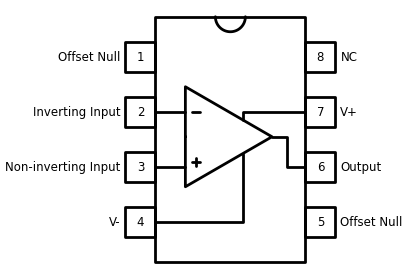

In [24]:
with schemdraw.Drawing() as d:
    Q = (elm.IcDIP(pins=8)
                 .label('Offset Null', loc='p1', fontsize=10)
                 .label('Inverting Input', loc='p2', fontsize=10)
                 .label('Non-inverting Input', loc='p3', fontsize=10)
                 .label('V-', loc='p4', fontsize=10)
                 .label('Offset Null', loc='p5', fontsize=10)
                 .label('Output', loc='p6', fontsize=10)
                 .label('V+', loc='p7', fontsize=10)
                 .label('NC', loc='p8', fontsize=10))
    elm.Line().at(Q.p2_in).length(d.unit/5)
    op = elm.Opamp().anchor('in1').scale(.8)
    elm.Line().at(Q.p3_in).length(d.unit/5)
    elm.Wire('c', k=.3).at(op.out).to(Q.p6_in)
    elm.Wire('-|').at(Q.p4_in).to(op.n1)
    elm.Wire('-|').at(Q.p7_in).to(op.n2)

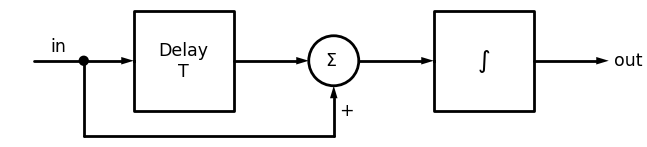

In [25]:
with schemdraw.Drawing() as d:
    dsp.Line().length(d.unit/3).label('in')
    inpt = dsp.Dot()
    dsp.Arrow().length(d.unit/3)
    delay = dsp.Box(w=2, h=2).anchor('W').label('Delay\nT')
    dsp.Arrow().right(d.unit/2).at(delay.E)
    sm = dsp.SumSigma()
    dsp.Arrow().at(sm.E).length(d.unit/2)
    intg = dsp.Box(w=2, h=2).anchor('W').label('$\int$')
    dsp.Arrow().right(d.unit/2).at(intg.E).label('out', loc='right')
    dsp.Line().down(d.unit/2).at(inpt.center)
    dsp.Line().tox(sm.S)
    dsp.Arrow().toy(sm.S).label('+', loc='bot')

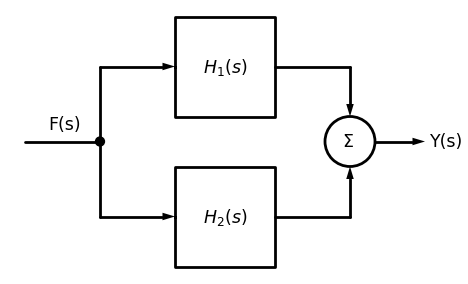

In [26]:
with schemdraw.Drawing() as d:
    d.config(fontsize=14)
    dsp.Line().length(d.unit/2).label('F(s)').dot()
    d.push()
    dsp.Line().up(d.unit/2)
    dsp.Arrow().right(d.unit/2)
    h1 = dsp.Box(w=2, h=2).anchor('W').label('$H_1(s)$')
    d.pop()
    dsp.Line().down(d.unit/2)
    dsp.Arrow().right(d.unit/2)
    h2 = dsp.Box(w=2, h=2).anchor('W').label('$H_2(s)$')
    sm = dsp.SumSigma().right().at((h1.E[0] + d.unit/2, 0)).anchor('center')
    dsp.Line().at(h1.E).tox(sm.N)
    dsp.Arrow().toy(sm.N)
    dsp.Line().at(h2.E).tox(sm.S)
    dsp.Arrow().toy(sm.S)
    dsp.Arrow().right(d.unit/3).at(sm.E).label('Y(s)', 'right')

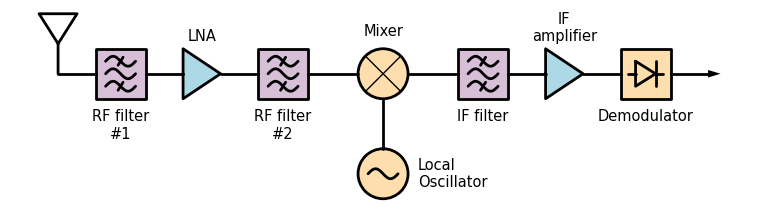

In [27]:
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    dsp.Antenna()
    dsp.Line().right(d.unit/4)
    dsp.Filter(response='bp').fill('thistle').anchor('W').label('RF filter\n#1', 'bottom', ofst=.2)
    dsp.Line().length(d.unit/4)
    dsp.Amp().fill('lightblue').label('LNA')
    dsp.Line().length(d.unit/4)
    dsp.Filter(response='bp').anchor('W').fill('thistle').label('RF filter\n#2', 'bottom', ofst=.2)
    dsp.Line().length(d.unit/3)
    mix = dsp.Mixer().fill('navajowhite').label('Mixer')
    dsp.Line().at(mix.S).down(d.unit/3)
    dsp.Oscillator().right().anchor('N').fill('navajowhite').label('Local\nOscillator', 'right', ofst=.2)
    dsp.Line().at(mix.E).right(d.unit/3)
    dsp.Filter(response='bp').anchor('W').fill('thistle').label('IF filter', 'bottom', ofst=.2)
    dsp.Line().right(d.unit/4)
    dsp.Amp().fill('lightblue').label('IF\namplifier')
    dsp.Line().length(d.unit/4)
    dsp.Demod().anchor('W').fill('navajowhite').label('Demodulator', 'bottom', ofst=.2)
    dsp.Arrow().right(d.unit/3)

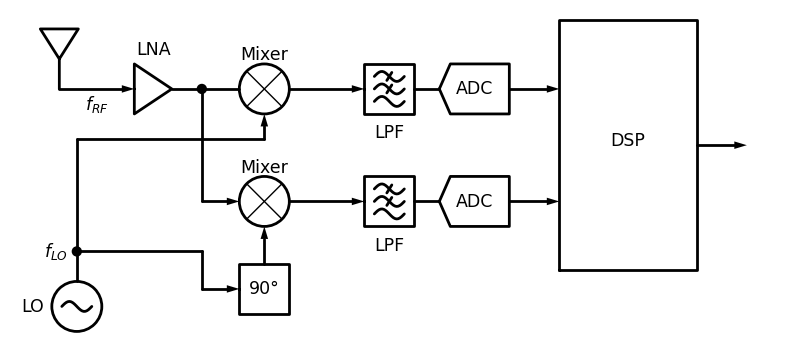

In [28]:
with schemdraw.Drawing() as d:
    dsp.Antenna()
    dsp.Arrow().right(d.unit/2).label('$f_{RF}$', 'bot')
    dsp.Amp().label('LNA')
    dsp.Line().right(d.unit/5).dot()
    d.push()
    dsp.Line().length(d.unit/4)
    mix1 = dsp.Mixer().label('Mixer', ofst=0)
    dsp.Arrow().length(d.unit/2)
    lpf1 = dsp.Filter(response='lp').label('LPF', 'bot', ofst=.2)
    dsp.Line().length(d.unit/6)
    adc1 = dsp.Adc().label('ADC')
    dsp.Arrow().length(d.unit/3)
    dsp1 = (dsp.Ic(pins=[dsp.IcPin(side='L'), dsp.IcPin(side='L'), dsp.IcPin(side='R')],
                   size=(2.75, 5), leadlen=0).anchor('inL2').label('DSP'))
    dsp.Arrow().at(dsp1.inR1).length(d.unit/3)
    d.pop()

    dsp.Line().toy(dsp1.inL1)
    dsp.Arrow().tox(mix1.W)
    mix2 = dsp.Mixer().label('Mixer', ofst=0)
    dsp.Arrow().tox(lpf1.W)
    dsp.Filter(response='lp').label('LPF', 'bot', ofst=.2)
    dsp.Line().tox(adc1.W)
    dsp.Adc().label('ADC')
    dsp.Arrow().to(dsp1.inL1)

    dsp.Arrow().down(d.unit/6).reverse().at(mix1.S)
    dsp.Line().left(d.unit*1.25)
    dsp.Line().down(d.unit*.75)
    flo = dsp.Dot().label('$f_{LO}$', 'left')
    d.push()
    dsp.Line().down(d.unit/5)
    dsp.Oscillator().right().anchor('N').label('LO', 'left', ofst=.15)
    d.pop()
    dsp.Arrow().down(d.unit/4).reverse().at(mix2.S)
    b1 = dsp.Square().right().label('90°').anchor('N')
    dsp.Arrow().left(d.unit/4).reverse().at(b1.W)
    dsp.Line().toy(flo.center)
    dsp.Line().tox(flo.center)

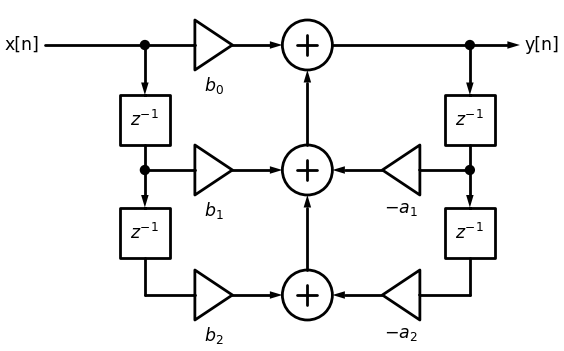

In [29]:
with schemdraw.Drawing() as d:
    d.config(unit=1, fontsize=14)
    dsp.Line().length(d.unit*2).label('x[n]', 'left').dot()

    d.push()
    dsp.Line().right()
    dsp.Amp().label('$b_0$', 'bottom')
    dsp.Arrow()
    s0 = dsp.Sum().anchor('W')
    d.pop()

    dsp.Arrow().down()
    z1 = dsp.Square(label='$z^{-1}$')
    dsp.Line().length(d.unit/2).dot()

    d.push()
    dsp.Line().right()
    dsp.Amp().label('$b_1$', 'bottom')
    dsp.Arrow()
    s1 = dsp.Sum().anchor('W')
    d.pop()

    dsp.Arrow().down(d.unit*.75)
    dsp.Square().label('$z^{-1}$')
    dsp.Line().length(d.unit*.75)
    dsp.Line().right()
    dsp.Amp().label('$b_2$', 'bottom')
    dsp.Arrow()
    s2 = dsp.Sum().anchor('W')

    dsp.Arrow().at(s2.N).toy(s1.S)
    dsp.Arrow().at(s1.N).toy(s0.S)

    dsp.Line().right(d.unit*2.75).at(s0.E).dot()
    dsp.Arrow().right().label('y[n]', 'right').hold()
    dsp.Arrow().down()
    dsp.Square().label('$z^{-1}$')
    dsp.Line().length(d.unit/2).dot()
    d.push()
    dsp.Line().left()
    a1 = dsp.Amp().label('$-a_1$', 'bottom')
    dsp.Arrow().at(a1.out).tox(s1.E)
    d.pop()

    dsp.Arrow().down(d.unit*.75)
    dsp.Square().label('$z^{-1}$')
    dsp.Line().length(d.unit*.75)
    dsp.Line().left()
    a2 = dsp.Amp().label('$-a_2$', 'bottom')
    dsp.Arrow().at(a2.out).tox(s2.E)

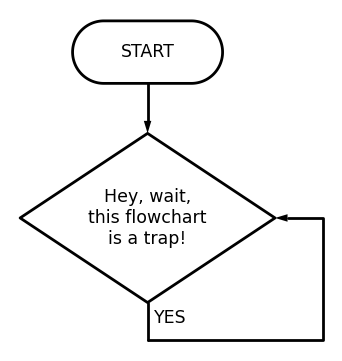

In [30]:
with schemdraw.Drawing() as d:
    flow.Start().label('START')
    flow.Arrow().down(d.unit/3)
    h = flow.Decision(S='YES').label('Hey, wait,\nthis flowchart\nis a trap!')
    flow.Line().down(d.unit/4)
    flow.Wire('c', k=3.5, arrow='->').to(h.E)

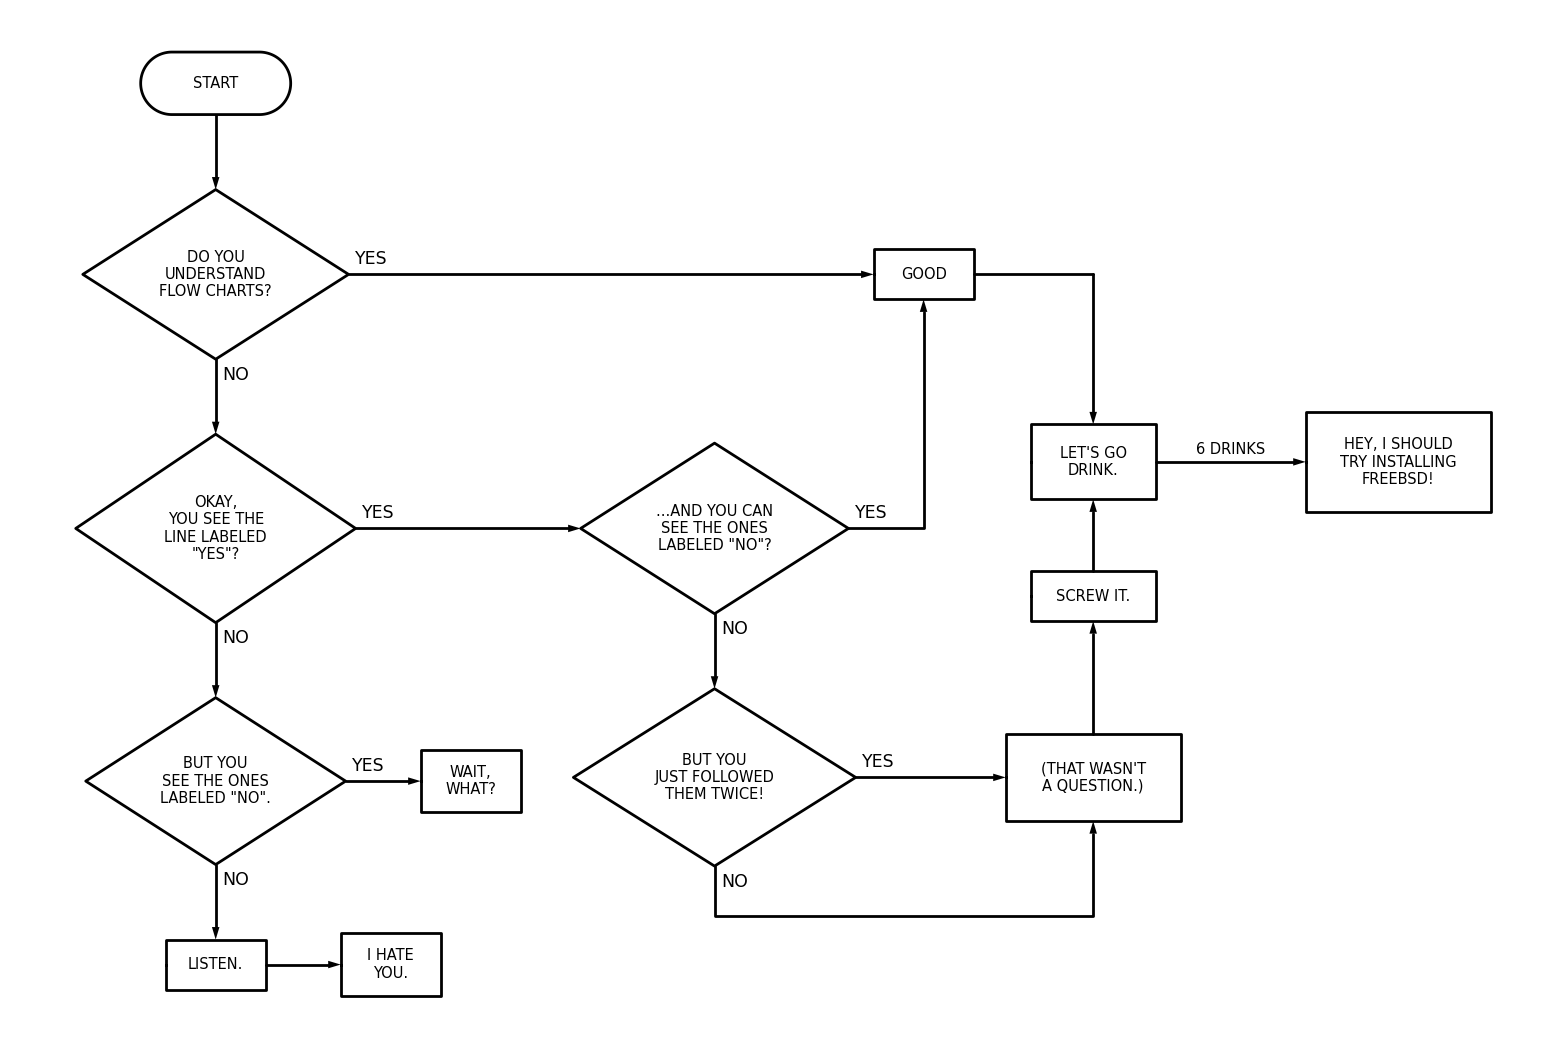

In [31]:
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    b = flow.Start().label('START')
    flow.Arrow().down(d.unit/2)
    d1 = flow.Decision(E='YES', S='NO').label('DO YOU\nUNDERSTAND\nFLOW CHARTS?')
    flow.Arrow().length(d.unit/2)
    d2 = flow.Decision(E='YES', S='NO').label('OKAY,\nYOU SEE THE\nLINE LABELED\n"YES"?')
    flow.Arrow().length(d.unit/2)
    d3 = flow.Decision(E='YES', S='NO').label('BUT YOU\nSEE THE ONES\nLABELED "NO".')

    flow.Arrow().right(d.unit/2).at(d3.E)
    flow.Box(w=2, h=1.25).anchor('W').label('WAIT,\nWHAT?')
    flow.Arrow().down(d.unit/2).at(d3.S)
    listen = flow.Box(w=2, h=1).label('LISTEN.')
    flow.Arrow().right(d.unit/2).at(listen.E)
    hate = flow.Box(w=2, h=1.25).anchor('W').label('I HATE\nYOU.')

    flow.Arrow().right(d.unit*3.5).at(d1.E)
    good = flow.Box(w=2, h=1).anchor('W').label('GOOD')
    flow.Arrow().right(d.unit*1.5).at(d2.E)
    d4 = flow.Decision(E='YES', S='NO').anchor('W').label('...AND YOU CAN\nSEE THE ONES\nLABELED "NO"?')

    flow.Wire('-|', arrow='->').at(d4.E).to(good.S)
    flow.Arrow().down(d.unit/2).at(d4.S)
    d5 = flow.Decision(E='YES', S='NO').label('BUT YOU\nJUST FOLLOWED\nTHEM TWICE!')
    flow.Arrow().right().at(d5.E)
    question = flow.Box(w=3.5, h=1.75).anchor('W').label("(THAT WASN'T\nA QUESTION.)")
    flow.Wire('n', k=-1, arrow='->').at(d5.S).to(question.S)

    flow.Line().at(good.E).tox(question.S)
    flow.Arrow().down()
    drink = flow.Box(w=2.5, h=1.5).label("LET'S GO\nDRINK.")
    flow.Arrow().right().at(drink.E).label('6 DRINKS')
    flow.Box(w=3.7, h=2).anchor('W').label('HEY, I SHOULD\nTRY INSTALLING\nFREEBSD!')
    flow.Arrow().up(d.unit*.75).at(question.N)
    screw = flow.Box(w=2.5, h=1).anchor('S').label('SCREW IT.')
    flow.Arrow().at(screw.N).toy(drink.S)

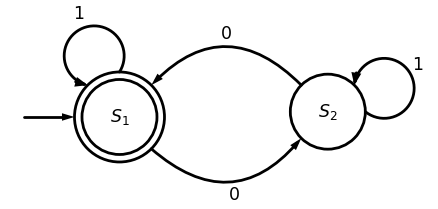

In [32]:
with schemdraw.Drawing() as d:
    elm.Arrow().length(1)
    s1 = flow.StateEnd().anchor('W').label('$S_1$')
    elm.Arc2(arrow='<-').at(s1.NE).label('0')
    s2 = flow.State().anchor('NW').label('$S_2$')
    elm.Arc2(arrow='<-').at(s2.SW).to(s1.SE).label('0')
    elm.ArcLoop(arrow='<-').at(s2.NE).to(s2.E).label('1')
    elm.ArcLoop(arrow='<-').at(s1.NW).to(s1.N).label('1')

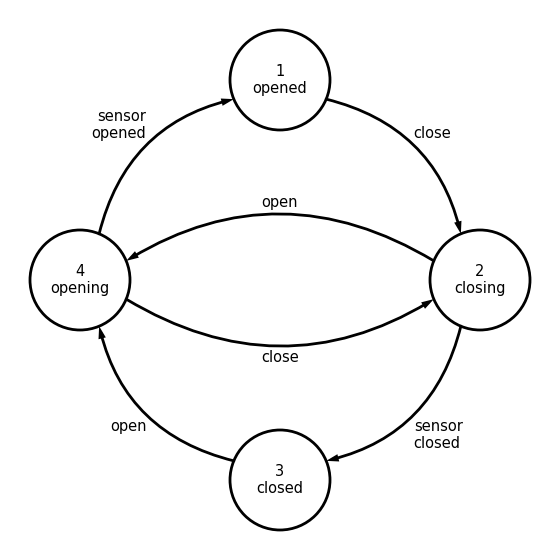

In [33]:
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    delta = 4
    c4 = flow.Circle(r=1).label('4\nopening')
    c1 = flow.Circle(r=1).at((delta, delta)).label('1\nopened')
    c2 = flow.Circle(r=1).at((2*delta, 0)).label('2\nclosing')
    c3 = flow.Circle(r=1).at((delta, -delta)).label('3\nclosed')
    elm.Arc2(arrow='->', k=.3).at(c4.NNE).to(c1.WSW).label('sensor\nopened')
    elm.Arc2(arrow='->', k=.3).at(c1.ESE).to(c2.NNW).label('close')
    elm.Arc2(arrow='->', k=.3).at(c2.SSW).to(c3.ENE).label('sensor\nclosed')
    elm.Arc2(arrow='->', k=.3).at(c3.WNW).to(c4.SSE).label('open')
    elm.Arc2(arrow='<-', k=.3).at(c4.ENE).to(c2.WNW).label('open')
    elm.Arc2(arrow='<-', k=.3).at(c2.WSW).to(c4.ESE).label('close')

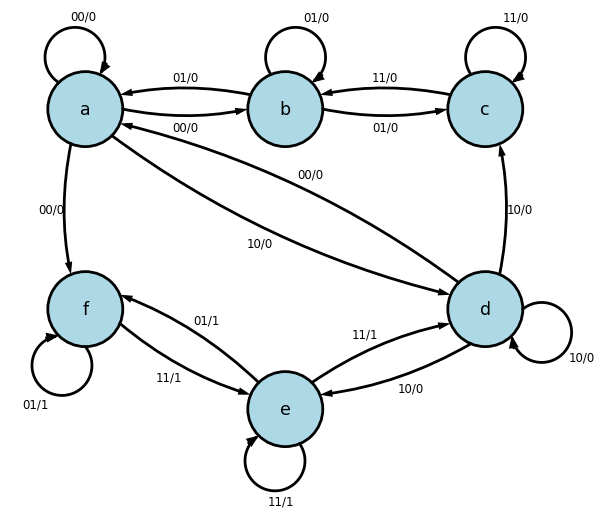

In [34]:
with schemdraw.Drawing() as dwg:
    a = flow.Circle().label('a').fill('lightblue')
    b = flow.Circle().at((4, 0)).label('b').fill('lightblue')
    c = flow.Circle().at((8, 0)).label('c').fill('lightblue')
    f = flow.Circle().at((0, -4)).label('f').fill('lightblue')
    e = flow.Circle().at((4, -6)).label('e').fill('lightblue')
    d = flow.Circle().at((8, -4)).label('d').fill('lightblue')
    elm.ArcLoop(arrow='->').at(a.NW).to(a.NNE).label('00/0', fontsize=10)
    elm.ArcLoop(arrow='->').at(b.NNW).to(b.NE).label('01/0', fontsize=10)
    elm.ArcLoop(arrow='->').at(c.NNW).to(c.NE).label('11/0', fontsize=10)
    elm.ArcLoop(arrow='->').at(d.E).to(d.SE).label('10/0', fontsize=10)
    elm.ArcLoop(arrow='->').at(e.SSE).to(e.SW).label('11/1', fontsize=10)
    elm.ArcLoop(arrow='->').at(f.S).to(f.SW).label('01/1', fontsize=10)
    elm.Arc2(k=.1, arrow='<-').at(a.ENE).to(b.WNW).label('01/0', fontsize=10)
    elm.Arc2(k=.1, arrow='<-').at(b.W).to(a.E).label('00/0', fontsize=10)
    elm.Arc2(k=.1, arrow='<-').at(b.ENE).to(c.WNW).label('11/0', fontsize=10)
    elm.Arc2(k=.1, arrow='<-').at(c.W).to(b.E).label('01/0', fontsize=10)
    elm.Arc2(k=.1, arrow='<-').at(a.ESE).to(d.NW).label('00/0', fontsize=10)
    elm.Arc2(k=.1, arrow='<-').at(d.WNW).to(a.SE).label('10/0', fontsize=10)
    elm.Arc2(k=.1, arrow='<-').at(f.ENE).to(e.NW).label('01/1', fontsize=10)
    elm.Arc2(k=.1, arrow='<-').at(e.WNW).to(f.ESE).label('11/1', fontsize=10)
    elm.Arc2(k=.1, arrow='->').at(e.NE).to(d.WSW).label('11/1', fontsize=10)
    elm.Arc2(k=.1, arrow='->').at(d.SSW).to(e.ENE).label('10/0', fontsize=10)
    elm.Arc2(k=.1, arrow='<-').at(f.NNW).to(a.SSW).label('00/0', fontsize=10)
    elm.Arc2(k=.1, arrow='<-').at(c.SSE).to(d.NNE).label('10/0', fontsize=10)


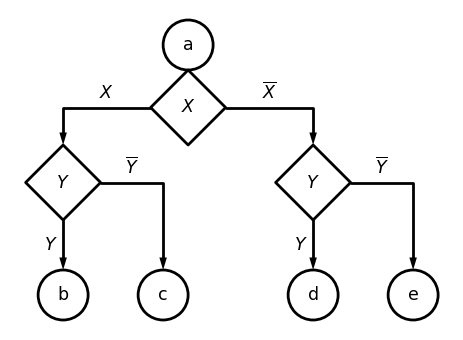

In [35]:
with schemdraw.Drawing(unit=1) as dwg:
    a = flow.Circle(r=.5).label('a')
    x = flow.Decision(w=1.5, h=1.5).label('$X$').at(a.S).anchor('N')
    elm.RightLines(arrow='->').at(x.E).label('$\overline{X}$')
    y1 = flow.Decision(w=1.5, h=1.5).label('$Y$')
    dwg.move_from(y1.N, dx=-5)
    y2 = flow.Decision(w=1.5, h=1.5).label('$Y$')
    elm.RightLines(arrow='->').at(x.W).to(y2.N).label('$X$')
    elm.Arrow().at(y2.S).label('$Y$')
    b = flow.Circle(r=.5).label('b')
    dwg.move_from(b.N, dx=2)
    c = flow.Circle(r=.5).label('c')
    elm.RightLines(arrow='->').at(y2.E).to(c.N).label('$\overline{Y}$')
    elm.Arrow().at(y1.S).label('$Y$')
    d = flow.Circle(r=.5).label('d')
    dwg.move_from(d.N, dx=2)
    e = flow.Circle(r=.5).label('e')
    elm.RightLines(arrow='->').at(y1.E).to(e.N).label('$\overline{Y}$')


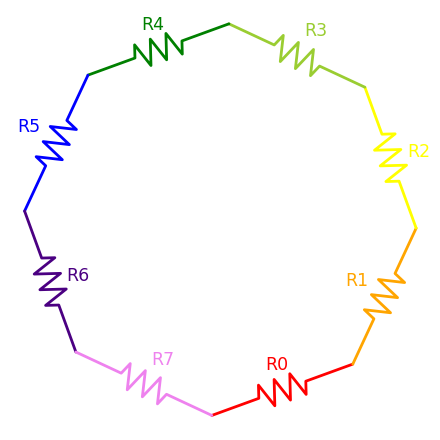

In [36]:
with schemdraw.Drawing() as d:
    for i, color in enumerate(['red', 'orange', 'yellow', 'yellowgreen', 'green', 'blue', 'indigo', 'violet']):
        elm.Resistor().theta(45*i+20).color(color).label('R{}'.format(i))

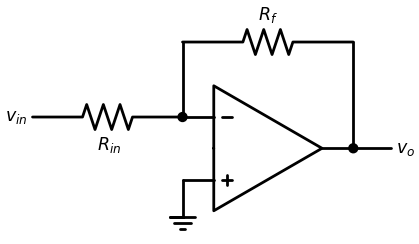

In [37]:
#import matplotlib.pyplot as plt
#plt.xkcd()

with schemdraw.Drawing() as d:
    op = elm.Opamp(leads=True)
    elm.Line().down().at(op.in2).length(d.unit/4)
    elm.Ground(lead=False)
    Rin = elm.Resistor().at(op.in1).left().idot().label('$R_{in}$', loc='bot').label('$v_{in}$', loc='left')
    elm.Line().up().at(op.in1).length(d.unit/2)
    elm.Resistor().tox(op.out).label('$R_f$')
    elm.Line().toy(op.out).dot()
    elm.Line().right().at(op.out).length(d.unit/4).label('$v_{o}$', loc='right')

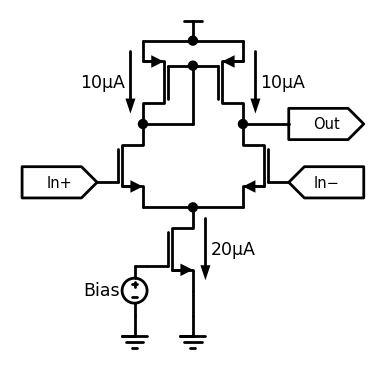

In [38]:
    with schemdraw.Drawing() as d:
        # tail transistor
        Q1 = elm.AnalogNFet().anchor('source').theta(0).reverse()
        elm.Line().down().length(0.5)
        ground = d.here
        elm.Ground()

        # input pair
        elm.Line().left().length(1).at(Q1.drain)
        Q2 = elm.AnalogNFet().anchor('source').theta(0).reverse()

        elm.Dot().at(Q1.drain)
        elm.Line().right().length(1)
        Q3 = elm.AnalogNFet().anchor('source').theta(0)

        # current mirror
        Q4 = elm.AnalogPFet().anchor('drain').at(Q2.drain).theta(0)
        Q5 = elm.AnalogPFet().anchor('drain').at(Q3.drain).theta(0).reverse()

        elm.Line().right().at(Q4.gate).to(Q5.gate)

        elm.Dot().at(0.5*(Q4.gate + Q5.gate))
        elm.Line().down().toy(Q4.drain)
        elm.Line().left().tox(Q4.drain)
        elm.Dot()

        # vcc connection
        elm.Line().right().at(Q4.source).to(Q5.source)
        elm.Dot().at(0.5*(Q4.source + Q5.source))
        elm.Vdd()

        # bias source
        elm.Line().left().length(0.25).at(Q1.gate)
        elm.SourceV().down().toy(ground).reverse().scale(0.5).label("Bias")
        elm.Ground()

        # signal labels
        elm.Tag().at(Q2.gate).label("In+").left()
        elm.Tag().at(Q3.gate).label("In−").right()
        elm.Dot().at(Q3.drain)
        elm.Line().right().tox(Q3.gate)
        elm.Tag().right().label("Out").reverse()

        # bias currents
        elm.CurrentLabel(length=1.25, ofst=0.25).at(Q1).label("20µA")
        elm.CurrentLabel(length=1.25, ofst=0.25).at(Q4).label("10µA")
        elm.CurrentLabel(length=1.25, ofst=0.25).at(Q5).label("10µA")

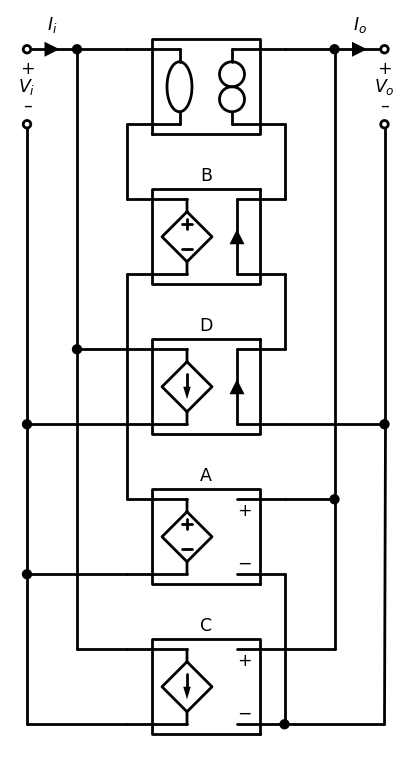

In [39]:
    with schemdraw.Drawing() as d:
        # place twoports
        N1 = elm.Nullor().anchor('center')
        T1 = elm.TransimpedanceTransactor(reverse_output=True).reverse().flip().anchor('center').at([0,-3]).label("B")
        T2 = elm.CurrentTransactor().reverse().flip().anchor('center').at([0,-6]).label("D")
        T3 = elm.VoltageTransactor().reverse().anchor('center').at([0,-9]).label("A")
        T4 = elm.TransadmittanceTransactor(reverse_output=True).reverse().anchor('center').at([0,-12]).label("C")

        ## make connections
        # right side
        elm.Line().at(N1.out_n).to(T1.in_n)
        elm.Line().at(T1.in_p).to(T2.in_n)
        elm.Line().at(T3.in_n).to(T4.in_n)

        elm.Line().right().length(1).at(N1.out_p)
        pre_out = d.here
        outline = elm.Line().right().length(1).dot(open=True)
        out = d.here
        elm.Gap().down().label(('+','$V_o$','–')).toy(N1.out_n)
        elm.Line().idot(open=True).down().toy(T4.in_n)
        elm.Line().left().to(T4.in_n)
        elm.Dot()
        elm.CurrentLabelInline(direction='in', ofst=-0.15).at(outline).label('$I_o$')

        elm.Line().at(T2.in_p).right().tox(out)
        elm.Dot()

        elm.Line().right().at(T4.in_p).tox(pre_out)
        elm.Line().up().toy(pre_out)
        elm.Dot()

        elm.Line().right().at(T3.in_p).tox(pre_out)
        elm.Dot()

        # left side
        elm.Line().down().at(N1.in_n).to(T1.out_n)

        elm.Line().up().at(T3.out_p).to(T1.out_p)

        elm.Line().left().at(N1.in_p).length(1)
        pre_in = d.here
        inline = elm.Line().length(1).dot(open=True).left()
        in_node = d.here
        elm.Gap().down().label(('+','$V_i$','–')).toy(N1.in_n)
        elm.Line().idot(open=True).down().toy(T4.out_n)
        elm.Line().right().to(T4.out_n)
        elm.CurrentLabelInline(direction='out', ofst=-0.15).at(inline).label('$I_i$')

        elm.Line().left().at(T2.out_p).tox(in_node)
        elm.Dot()
        elm.Line().left().at(T3.out_n).tox(in_node)
        elm.Dot()

        elm.Line().left().at(T4.out_p).tox(pre_in)
        elm.Line().up().toy(pre_in)
        elm.Dot()

        elm.Line().left().at(T2.out_n).tox(pre_in)
        elm.Dot()